* Test

In [2]:
# Utils
import numpy as np
from scipy.io import mmread
import time
import matplotlib.pyplot as plt

In [8]:
# Load the matrix from the file
matrix = mmread('matrix_set/bcspwr06.mtx')
A = matrix.toarray()

# Print the matrix
print(A)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]


In [ ]:
def plot_numeric_complexity(path="matrix_set/bcspwr06.mtx"):
    plt.ion()

    # Load the matrix from the file
    matrix = mmread('matrix_set/bcspwr06.mtx')
    matrix = matrix.toarray()

    m, n = matrix.shape
    if m != n:
        raise Exception("Non squared matrix")
    
    solving_time = []
    bloc_size = []
    bloc = 1
    for bloc in range(0, m//2, 2 * bloc):
        A = matrix[:m, :m]
        start = time.time()
        Q, R = np.linalg.qr(A)
        end = time.time()
        bloc_size.append(bloc)
        solving_time.append(end-start)

        # Plot
        plt.clf()
        plt.plot(bloc_size, solving_time, '-')
        plt.grid()
        plt.xlabel('Matrix bloc size')
        plt.ylabel('time')
        plt.title("QR DECOMPOSITION BY BLOCK")
        plt.pause(0.001)

    plt.ioff()
    plt.show()

plot_numeric_complexity()


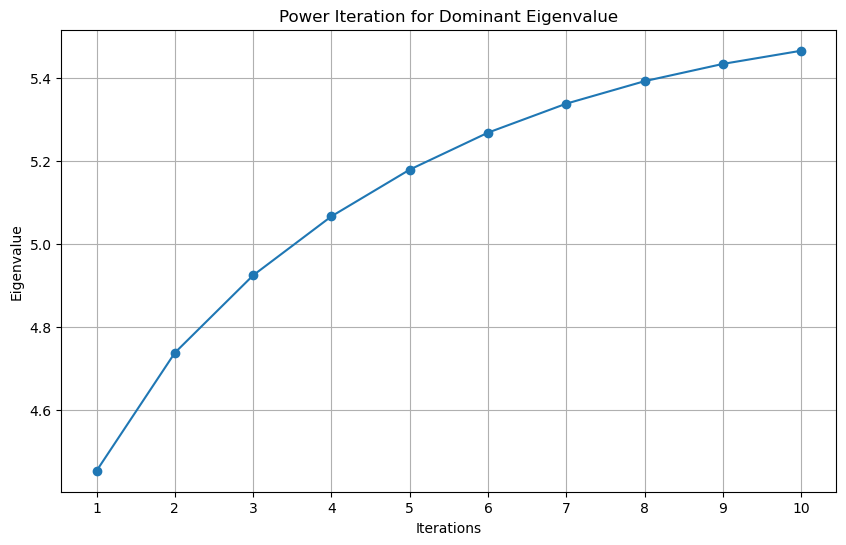

Final Dominant Eigenvalue: 5.4645468270991895
Final Dominant Eigenvector: [0.00993312 0.00820994 0.00102923 ... 0.00082963 0.00278679 0.00119016]


In [17]:
# Define the matrix
A = mmread('matrix_set/bcspwr06.mtx')
A = A.toarray()
#A = np.random.rand(100, 100)

# Initial guess for the eigenvector
v = np.ones(A.shape[0])

# Number of iterations
num_iterations = 10

# Lists to store eigenvalues and eigenvectors for plotting
eigenvalues = []
eigenvectors = []

# Power iteration
for i in range(num_iterations):
    # Power iteration step
    v = np.dot(A, v)

    # Normalize the eigenvector
    v = v / np.linalg.norm(v)

    # Compute the eigenvalue
    eigenvalue = np.dot(np.dot(v, A), v) / np.dot(v, v)

    # Store eigenvalues and eigenvectors
    eigenvalues.append(eigenvalue)
    eigenvectors.append(v)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Power Iteration for Dominant Eigenvalue')
plt.xlabel('Iterations')
plt.ylabel('Eigenvalue')
plt.plot(range(1, num_iterations + 1), eigenvalues, marker='o', linestyle='-')
plt.grid(True)
plt.xticks(range(1, num_iterations + 1))
plt.show()

# Display the final eigenvalue and eigenvector
print("Final Dominant Eigenvalue:", eigenvalues[-1])
print("Final Dominant Eigenvector:", eigenvectors[-1])

In [9]:
A.shape

(1454, 1454)

In [10]:
start = time.time()
Q = np.linalg.qr(A)
end = time.time()
print(f"time: {end-start}")

time: 0.35243797302246094


* Course example

In [5]:
import numpy as np

def gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Example usage
A = np.array([[1, 3, 1], [1, 3, 7], [1, -1, -4], [1, -1, 2]])
Q, R = gram_schmidt(A)

print("Matrix Q:")
print(Q)
print("\nMatrix R:")
print(R)

Matrix Q:
[[ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5]]

Matrix R:
[[2. 2. 3.]
 [0. 4. 5.]
 [0. 0. 6.]]
